In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as col
import sys
sys.path.append('/pool/firebolt1/p484/projects/huang/rings')
from continuumanalysis3 import Continuum
from fitellipse import *


In [2]:

disk = {'filename': '/data/sandrews/ALMA_disks/DR/OLD/fiducial_images/MYLup_continuum.fits',
                          'distance':156,
                          'incl' : 73.2,
                          'PA' : 58.8,
                          'offsetx' : -25.96*.003,
                          'offsety' : 20.97*.003,
                          'size': 1.5,
                          'gamma': 0.8
                         }
cont = Continuum(disk['filename'], disk['offsetx'],disk['offsety'], disk['PA'], disk['incl'], disk['distance'])
maxrad = 100
radialbins = 0.5+1*np.arange(maxrad)
_,_, rtmap = cont.azunwrap(radialbins, tbins = -175 + 10.*np.arange(36))

surfbrightness, SB_scatter = cont.radialprofile(radialbins, high_incl = True)



/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


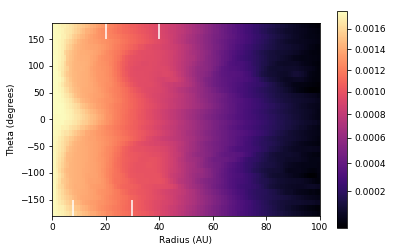

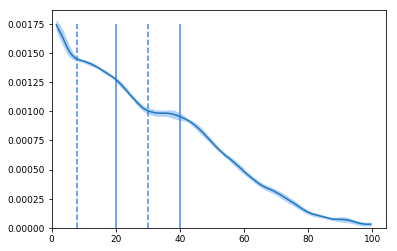

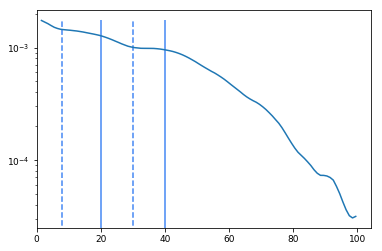

In [16]:
plt.imshow(rtmap,extent =[0.5, np.max(radialbins)+0.5, -180,180], 
           aspect = 0.2, origin = 'lower', cmap = 'magma', norm = col.PowerNorm(gamma = disk['gamma']))
gaps = np.array([8,30])
rings = np.array([20, 40])
for gap in gaps:
    plt.vlines(gap,-180,-150, color ='white')
for ring in rings:
    plt.vlines(ring,150,180, color ='white')
plt.ylim(ymin = -180, ymax = 180)
plt.xlim(xmin=0, xmax=maxrad)
plt.xlim(xmin=0, xmax=maxrad)
plt.colorbar()
plt.xlabel('Radius (AU)')
plt.ylabel('Theta (degrees)')
plt.show()

plt.plot(radialbins, surfbrightness)
plt.fill_between(radialbins,(surfbrightness - SB_scatter),(surfbrightness + SB_scatter),facecolor = '#B2D1FF',edgecolor = '#B2D1FF')
for gap in gaps:
    plt.vlines(gap,0,.00175, color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,0,.00175, color ='#4286f4')
plt.xlim(xmin = 0)
plt.ylim(ymin =0)
plt.show()


plt.semilogy(radialbins, surfbrightness)
for gap in gaps:
    plt.vlines(gap,0,.00175,color ='#4286f4', linestyles= 'dashed')
for ring in rings:
    plt.vlines(ring,0,.00175, color ='#4286f4')
plt.xlim(xmin = 0)
plt.show()

(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 89, 98, 99]),)


/home/janehuan/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


(-0.1, 0.05)

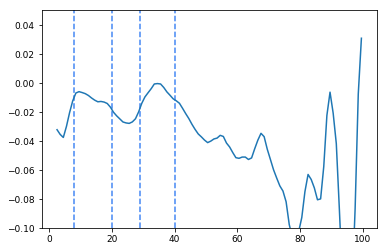

In [9]:
print(np.where(np.gradient(surfbrightness)/surfbrightness>-0.02))
plt.plot(radialbins, np.gradient(surfbrightness)/surfbrightness)
for gap in [8,20,29,40]:
    plt.vlines(gap,-0.1,0.05, color ='#4286f4', linestyles= 'dashed')
plt.ylim(ymin = -0.1, ymax = 0.05)

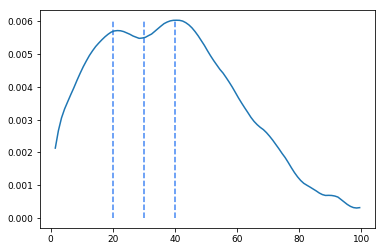

In [14]:
plt.plot(radialbins, surfbrightness*np.sqrt(radialbins))
for gap in [20,30,40]:
    plt.vlines(gap,0,0.006, color ='#4286f4', linestyles= 'dashed')

In [11]:
find_profile_extrema(radialbins, surfbrightness*np.sqrt(radialbins), extrema = 'max')

/pool/firebolt1/p484/projects/huang/rings/fitellipse.py:120: RuntimeWarning: invalid value encountered in greater
  sgn_chg = np.where((np.sign(grad[:-1])!=np.sign(grad[1:])) & (np.sign(grad[:-1])>0))[0]


[21, 40]

In [4]:
bins = 0.5+1*np.arange(0, 150)

cumeflux = cont.cumefluxprofile(bins)

86.5


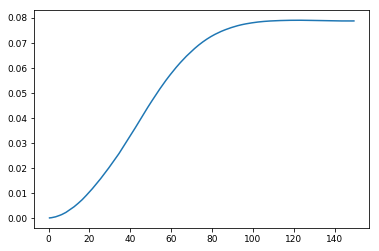

In [5]:
plt.plot(bins, cumeflux)
print(bins[np.argmin(np.abs(cumeflux-0.95*np.max(cumeflux)))])